# DA CRUZ Bruno **21426305**    &   Plantier Xavier **21426316**

<img src="https://upload.wikimedia.org/wikipedia/fr/8/81/Sciences_SU.png" width="240" height="240" align="center"/>



# MLA 703. RNN-LSTM et architectures avancées [Analyse de sentiment]

In [ ]:
# Dans ce notebook, nous allons nous intéresser à des tâches d'analyse de sentiments
# -> c'est à dire prédire un label de sentiment (ici positif ou négatif) à partir d'un texte

# Ce notebook vise à approfondir :
# - L'application du DL sur des données textuelles
# - La compréhension des architectures RNN avancées comme les LSTM et les mécanismes d'attention

# Nous allons tester les architectures demandées puis créer et adapter de nouvelles architectures de RNN.

# 1. Importation des modules

In [ ]:
# On importe les librairies usuelless
import math
import numpy as np
import matplotlib.pyplot as plt

# On désactive les warnings
import warnings
warnings.filterwarnings('ignore')


# 2. Charger les données

## 2.1. Formater/Préparer les données

In [ ]:
# On charge directement la base IMDB par les datasets de Keras
# La méthode load_date possède pas mal d'options et de propriétés intéressantes (voir description) :
# 1) Sépare les jeux d'entrainement et de test
# 2) num_words : Top most frequent words to consider.
# 3) skip_top : Top most frequent words to ignore (they will appear as oov_char value in the sequence data).
# 4) maxlen : Maximum sequence length. Any longer sequence will be truncated.
# 5) seed : Seed for reproducible data shuffling.
# 6) start_char : The start of a sequence will be marked with this character. Set to 1 because 0 is usually the padding character.
# 7) oov_char : words that were cut out because of the num_words or skip_top limit will be replaced with this character.
# 8) index_from : Index actual words with this index and higher.

from keras.datasets import imdb

num_words = 5000
max_len   =  100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,
                                                      maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# On padde les séquences

print("La phrase avant padding est : \n {}". format(x_train[0]))

# On padde les séquence de mot
max_len       = 100
x_train       = pad_sequences(x_train, maxlen=max_len, truncating='post')
x_test        = pad_sequences(x_test, maxlen=max_len, truncating='post')

print("La phrase paddée sur une longueur {} est : \n {}". format(max_len, x_train[0]))

print(len(x_train))

print(x_train[0])

La phrase avant padding est : 
 [1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 2, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
La phrase paddée sur une longueur 100 est : 
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1  778  128   74   12  630  163   15    4 1766    2 1051    2
   32   85  156   45   40  148  139  121  664  665   10   10 1361  173
    4  749    2   16 3804    8    4  226   65   12   43  127   24    2
   10   10]
2773
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    

# 3. Déclaration du réseau

La tâche consiste à prédire la valence d'un texte à partir de son contenu.
Pour ce faire nous allons créer une architecture many-to-one
avec les réseaux RNNs
Le problème consiste à implémenter et apprendre
des réseaux avec - par exemple - les configurations suivantes :
On va comparer les configurations suivantes :
- Simple RNN avec dropout (avec un taux de 25% en sortie du RNN)
- RNN-LSTM gauche-droite classique
- LSTM bi-directionnel et return_sequences = False
- Plusieurs couches au choix. On veillera en particulier
  à la valeur des arguments return_sequences
  
Dans le rapport à faire directement dans le notebook, on prendra soin de :
- reporter les losses sur les ensembles d'entrainement et de validation
- mesurer l'accuracy sur l'ensemble de test
On commentera les résultats obtenus en comparant les configurations
Quelle est la configuration donnant la meilleure performance ?
Pourquoi ?

Aide : une couche LSTM bi-directionnelle est obtenue en appliquant sur la même couche une couche LSTM et une couche Bidirectional

## 3.1. RNN simple

In [ ]:
# On importe les librairies pour le RNN
from keras.layers import Dense , Input , SimpleRNN, LSTM , Embedding, Dropout, GRU
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
#from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

embed_size = 128                                                   # dimension de l'embedding
RNN_size   = 64

# Example d'architecture pour le réseau RNN simple avec dropout
model = Sequential()
model.add(Embedding(num_words, embed_size))                 # layer embedding
model.add(SimpleRNN(RNN_size, return_sequences = False))    # layer RNN
model.add(Dropout(0.25))                                    # layer Dropout
model.add(Dense(1))                                         # layer Dense

# On instancie le réseau
model.build((None, None))

# On affiche l'architecture de notre modèle
model.summary()

# On spécifie la fonction de perte, l'optimiseur, et la fonction d'évaluation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 652,417 (2.49 MB)

 Trainable params: 652,417 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2. Entrainement du réseau

In [ ]:
# On entraine le réseau simple RNN avec dropout
batch_size = 64                                                             # tailles des mini-batch
epochs = 10                                                                 # nombre d'époques
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4882 - loss: 2.7616 - val_accuracy: 0.5405 - val_loss: 0.7099
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.6320 - loss: 0.9137 - val_accuracy: 0.5766 - val_loss: 0.7743
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8022 - loss: 0.5283 - val_accuracy: 0.5351 - val_loss: 0.8381
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9303 - loss: 0.2203 - val_accuracy: 0.5586 - val_loss: 0.9063
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9861 - loss: 0.0849 - val_accuracy: 0.5441 - val_loss: 1.1534
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9985 - loss: 0.0301 - val_accuracy: 0.5441 - val_loss: 1.3620
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9986 - loss: 0.0140 - val_accuracy: 0.5261 - val_loss: 1.4400
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.5297 - v

## 3.3. Résultat

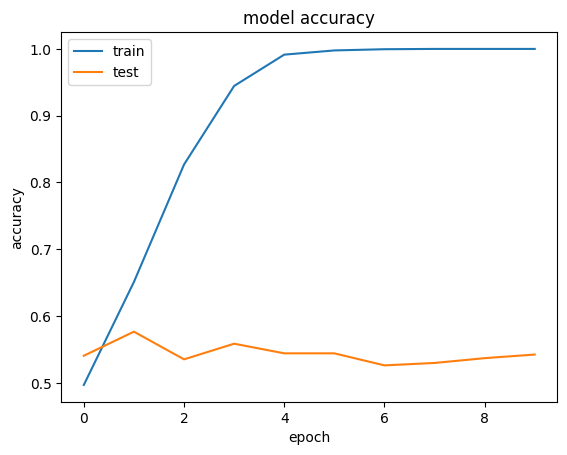

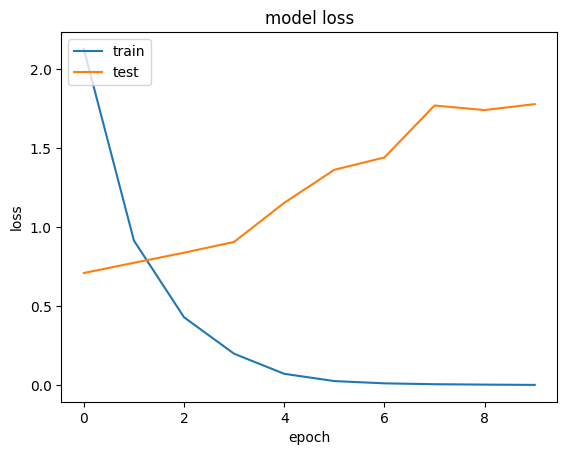

In [ ]:
# On trace la loss et l'accuracy du modèle simple avec dropout
# On trace l'évolution de l'accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# On trace l'évolution de la loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On prédit sur l'ensemble de test

# On prédit sur les données de test
y_hat = model.predict(x_test)

# On tranforme les prédictions en labels
i_pos = [i for i in range(len(y_hat)) if y_hat[i]>0]
i_neg = [i for i in range(len(y_hat)) if y_hat[i]<=0]

y_pred   = np.zeros(len(y_hat))
y_pred[i_pos] = 1
y_pred[i_neg] = 0


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


# 4. RNN-LSTM gauche droite simple

## 4.1. Déclaration du réseau

In [ ]:
#Architecture RNN-LSTM gauche droite classique
LSTM_model = Sequential()
LSTM_model.add(Embedding(num_words, embed_size))
LSTM_model.add(LSTM(RNN_size, return_sequences = False))
LSTM_model.add(Dropout(0.25))
LSTM_model.add(Dense(1)) #eventuellement rajouter une fonction d'activation sigmoïde

# On instancie le réseau
LSTM_model.build((None, None))

#Vérification des paramètres du réseau
LSTM_model.summary()

#Affichage de la fonction de perte
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ (None, None, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2. Entrainement du réseau

In [ ]:
# On entraine le réseau LSTM gauche droite classique
batch_size = 64                                                             # tailles des mini-batch
epochs = 10
history_LSTM = LSTM_model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.4723 - loss: 1.5840 - val_accuracy: 0.6559 - val_loss: 0.6507
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.7092 - loss: 0.5880 - val_accuracy: 0.7387 - val_loss: 0.5670
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.8673 - loss: 0.4901 - val_accuracy: 0.7459 - val_loss: 0.6748
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.7042 - loss: 0.5594 - val_accuracy: 0.6991 - val_loss: 0.6637
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.8710 - loss: 0.3634 - val_accuracy: 0.7027 - val_loss: 0.5920
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.9126 - loss: 0.2863 - val_accuracy: 0.7405 - val_loss: 1.0034
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9464 - loss: 0.1752 - val_accuracy: 0.7748 - val_loss: 0.9127
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.9754 - loss: 0.1244 - val_accuracy: 0

## 4.3. Résultat

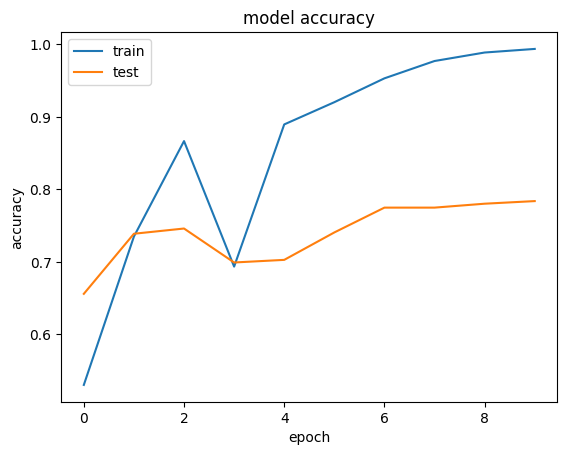

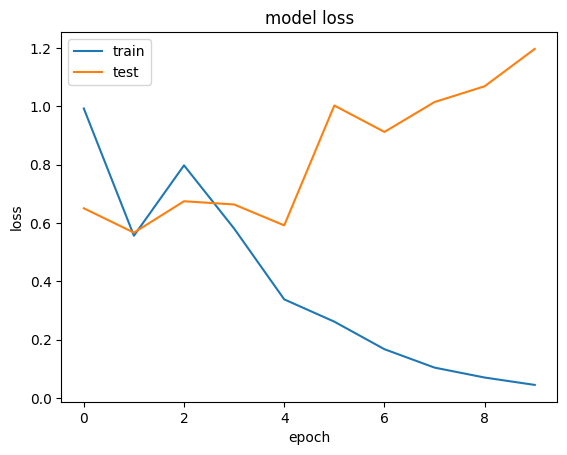

In [ ]:
# On trace la loss et l'accuracy du modèle
# On trace l'évolution de l'accuracy
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# On trace l'évolution de la loss
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On prédit sur le modèle LSTM classique

# On prédit sur les données de test
y_hat_1 = LSTM_model.predict(x_test)

# On tranforme les prédictions en labels
i_pos_1 = [i for i in range(len(y_hat_1)) if y_hat_1[i]>0]
i_neg_1 = [i for i in range(len(y_hat_1)) if y_hat_1[i]<=0]

y_pred_1   = np.zeros(len(y_hat_1))
y_pred_1[i_pos_1] = 1
y_pred_1[i_neg_1] = 0

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


# 5. RNN-LSTM bi directionnel

## 5.1. Déclaration du réseau

In [ ]:
#Architecture LSTM bi-directionnel
bi_LSTM_model = Sequential()
bi_LSTM_model.add(Embedding(num_words, embed_size))
bi_LSTM_model.add(Bidirectional(LSTM(RNN_size, return_sequences = False)))
bi_LSTM_model.add(Dropout(0.25))
bi_LSTM_model.add(Dense(1))

# On instancie le réseau
bi_LSTM_model.build((None, None))

#Vérification des paramètres du réseau
bi_LSTM_model.summary()

#Affichage de la fonction de perte
bi_LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)             │ (None, None, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_31 (Bidirectional)     │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

## 5.2. Entrainement du réseau

In [ ]:
# On entraine le réseau LSTM bi directionnel
batch_size = 64                                                             # tailles des mini-batch
epochs = 10
history_bi_LSTM = bi_LSTM_model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 269ms/step - accuracy: 0.4952 - loss: 0.9327 - val_accuracy: 0.5784 - val_loss: 0.6644
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 304ms/step - accuracy: 0.6497 - loss: 0.6252 - val_accuracy: 0.6577 - val_loss: 0.6458
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - accuracy: 0.8277 - loss: 0.4617 - val_accuracy: 0.7874 - val_loss: 0.5027
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - accuracy: 0.9192 - loss: 0.2538 - val_accuracy: 0.6703 - val_loss: 0.6808
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 316ms/step - accuracy: 0.8880 - loss: 0.3061 - val_accuracy: 0.7982 - val_loss: 0.7932
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step - accuracy: 0.9704 - loss: 0.1403 - val_accuracy: 0.8018 - val_loss: 1.0468
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - accuracy: 0.9897 - loss: 0.0651 - val_accuracy: 0.7928 - val_loss: 1.1905
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 399ms/step - accuracy: 0.9967 - loss: 0.0276 - val_accur

## 5.3. Résultat

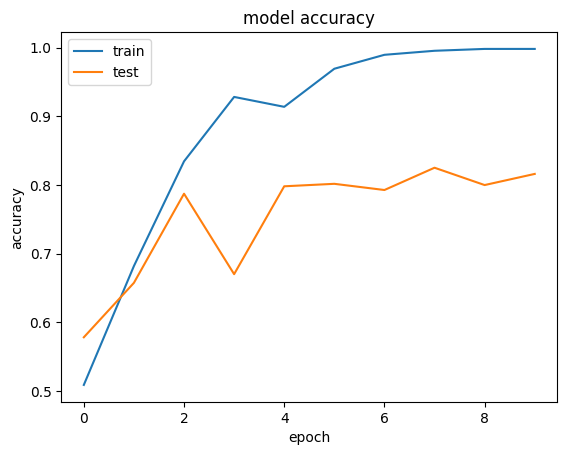

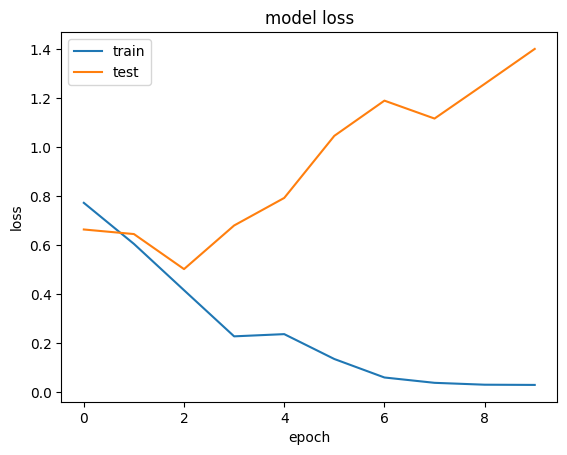

In [ ]:
# On trace la loss et l'accuracy du modèle bidirectionnel LSTM
# On trace l'évolution de l'accuracy
plt.plot(history_bi_LSTM.history['accuracy'])
plt.plot(history_bi_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# On trace l'évolution de la loss
plt.plot(history_bi_LSTM.history['loss'])
plt.plot(history_bi_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On prédit sur les données de test
y_hat_2 = bi_LSTM_model.predict(x_test)

# On tranforme les prédictions en labels
i_pos_2 = [i for i in range(len(y_hat_2)) if y_hat_2[i]>0]
i_neg_2 = [i for i in range(len(y_hat_2)) if y_hat_2[i]<=0]

y_pred_2   = np.zeros(len(y_hat_2))
y_pred_2[i_pos_2] = 1
y_pred_2[i_neg_2] = 0

93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


# 6. RNN avec plusieurs couches LSTM bi directionnelles

Nous allons tester une architecture avec deux LSTM bi directionnelles avec dropout réglé manuellement. Les couches LSTM bidirectionnelles semblent être performantes, la combinaison de ses deux modèles devraient permettre d'améliorer la précision et la perte.

## 6.1. Déclaration du réseau

En ajoutant une deuxième couche LSTM après la première, le modèle a plus de capacité d'abstraction, ce qui peut être utile pour détecter des patterns complexes dans le texte.

In [ ]:
dropout = 0.25

#Architecture LSTM avec plusieurs couches
multi_bi_LSTM_model = Sequential()
multi_bi_LSTM_model.add(Embedding(num_words, embed_size))
multi_bi_LSTM_model.add(Bidirectional(LSTM(RNN_size, return_sequences = True)))
multi_bi_LSTM_model.add(Dropout(dropout))
multi_bi_LSTM_model.add(Bidirectional(LSTM(RNN_size, return_sequences = False)))
multi_bi_LSTM_model.add(Dropout(dropout))
multi_bi_LSTM_model.add(Dense(1))

# On instancie le réseau
multi_bi_LSTM_model.build((None, None))

#Vérification des paramètres du réseau
multi_bi_LSTM_model.summary()

#Affichage de la fonction de perte
multi_bi_LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ (None, None, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_20 (Bidirectional)     │ (None, None, 128)           │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, None, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_21 (Bidirectional)     │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 837,761 (3.20 MB)

 Trainable params: 837,761 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

## 6.2. Entrainement du réseau

In [ ]:
# On entraine le réseau LSTM gauche droite classique
batch_size = 64                                                             # tailles des mini-batch
epochs = 10
history_multi_bi_LSTM = multi_bi_LSTM_model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 570ms/step - accuracy: 0.5012 - loss: 1.6357 - val_accuracy: 0.5856 - val_loss: 0.6451
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 650ms/step - accuracy: 0.7064 - loss: 0.5844 - val_accuracy: 0.7586 - val_loss: 0.5643
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 609ms/step - accuracy: 0.9028 - loss: 0.3109 - val_accuracy: 0.7369 - val_loss: 0.5508
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 613ms/step - accuracy: 0.9254 - loss: 0.3194 - val_accuracy: 0.7495 - val_loss: 1.2915
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 543ms/step - accuracy: 0.9598 - loss: 0.2151 - val_accuracy: 0.7838 - val_loss: 1.2258
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 592ms/step - accuracy: 0.9690 - loss: 0.1587 - val_accuracy: 0.7495 - val_loss: 1.3589
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 42s 610ms/step - accuracy: 0.9848 - loss: 0.1195 - val_accuracy: 0.7459 - val_loss: 1.7884
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 613ms/step - accuracy: 0.9820 - loss: 0.0830 - val_accu

## 6.3. Résultat

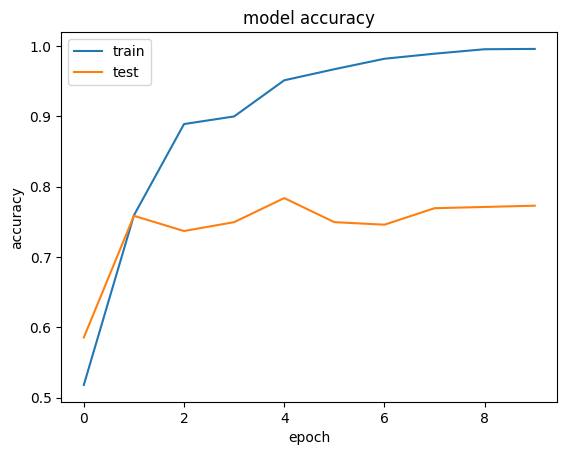

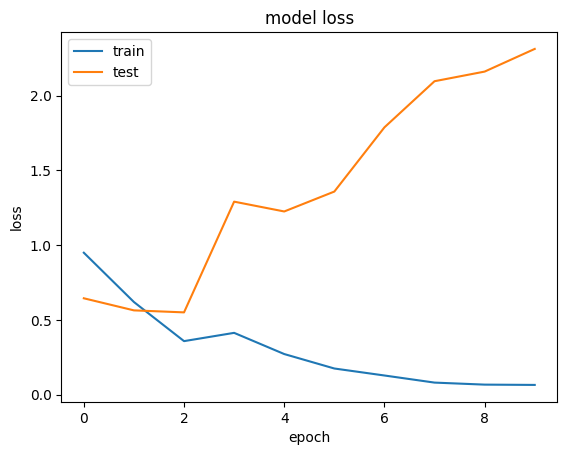

In [ ]:
# On trace la loss et l'accuracy du modèle multicouche LSTM
# On trace l'évolution de l'accuracy
plt.plot(history_multi_bi_LSTM.history['accuracy'])
plt.plot(history_multi_bi_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# On trace l'évolution de la loss
plt.plot(history_multi_bi_LSTM.history['loss'])
plt.plot(history_multi_bi_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On prédit sur les données de test
y_hat_3 = multi_bi_LSTM_model.predict(x_test)

# On tranforme les prédictions en labels
i_pos_3 = [i for i in range(len(y_hat_3)) if y_hat_3[i]>0]
i_neg_3 = [i for i in range(len(y_hat_3)) if y_hat_3[i]<=0]

y_pred_3   = np.zeros(len(y_hat_2))
y_pred_3[i_pos_3] = 1
y_pred_3[i_neg_3] = 0

93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step


#7. RNN couche 1 LSTM puis couche 2 LSTM bi directionnel

Nous choisissons de créer notre propre modèle en ajoutant en premier lieu une couche LSTM puisque d'après les résultats (onglet 4), les couches LSTM semblent donner de meilleurs résultats en terme de précision et de perte. L'association de deux couches bi-directionnel (onglet 6) n'ont pas donné de bons résultats. Les couches LSTM traitent les séquences chronologiquement et conserve l'ordre. Nous ajoutons un dropout pour éviter le suraprentissage que nous réglons de manière à améliorer les résultats. A la suite de cela, nous décidons d'ajouter une couche LSTM bi-directionnelle pour permettre un appentissage en tenant compte de la lecture des mots dans les deux sens et permettant ainsi d'avoir une meilleure analyse de sentiments en créant des dépendances avec le passé mais aussi le futur. On ajoute à nouveau un dropout à la fin de cette couche.

## 7.1. Déclaration du réseau

In [ ]:
droput = 0.25


LSTM_bi_LSTM_model = Sequential()
LSTM_bi_LSTM_model.add(Embedding(num_words, embed_size))
LSTM_bi_LSTM_model.add(LSTM(RNN_size, return_sequences=True))
LSTM_bi_LSTM_model.add(Dropout(dropout))
LSTM_bi_LSTM_model.add(Bidirectional(LSTM(RNN_size, return_sequences=False)))
LSTM_bi_LSTM_model.add(Dropout(droput))
LSTM_bi_LSTM_model.add(Dense(1))                                         # layer Dense

# On instancie le réseau
LSTM_bi_LSTM_model.build((None, None))

# On affiche l'architecture de notre modèle
LSTM_bi_LSTM_model.summary()

#Affichage de la fonction de perte
LSTM_bi_LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)             │ (None, None, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, None, 64)            │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_22 (Bidirectional)     │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 755,585 (2.88 MB)

 Trainable params: 755,585 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

## 7.2. Entrainement du réseau

In [ ]:
# On entraine le réseau LSTM gauche droite classique
batch_size = 64                                                             # tailles des mini-batch
epochs = 10
history_LSTM_bi_LSTM = LSTM_bi_LSTM_model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

## 7.3. Résultat

In [ ]:
# On trace la loss et l'accuracy du modèle
# On trace l'évolution de l'accuracy
plt.plot(history_LSTM_bi_LSTM.history['accuracy'])
plt.plot(history_LSTM_bi_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# On trace l'évolution de la loss
plt.plot(history_LSTM_bi_LSTM.history['loss'])
plt.plot(history_LSTM_bi_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On prédit sur les données de test
y_hat_4 = LSTM_bi_LSTM_model.predict(x_test)

# On tranforme les prédictions en labels
i_pos_4 = [i for i in range(len(y_hat_4)) if y_hat_4[i]>0]
i_neg_4 = [i for i in range(len(y_hat_4)) if y_hat_4[i]<=0]

y_pred_4   = np.zeros(len(y_hat_4))
y_pred_4[i_pos_4] = 1
y_pred_4[i_neg_4] = 0

#8. RNN-GRU

Nous essayons une structure RNN de type GRU ([Source](https://penseeartificielle.fr/comprendre-lstm-gru-fonctionnement-schema/)) semblant pouvoir palier les problèmes de mémoire à court et long terme du RNN simple. Nous souhaitons le comparer avec un réseau LSTM composé d'une couche simple et d'une couche bidirectionnelle ayant donné de bon résultats (onglet 7)

## 8.1. Déclaration du réseau

In [ ]:
#Architecture GRU
GRU_model = Sequential()
GRU_model.add(Embedding(num_words, embed_size))
GRU_model.add(Bidirectional(GRU(RNN_size, return_sequences = False)))
GRU_model.add(Dropout(0.25))
GRU_model.add(Dense(1))


# On instancie le réseau
GRU_model.build((None, None))

#Vérification des paramètres du réseau
GRU_model.summary()

#Affichage de la fonction de perte
GRU_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 8.2. Entrainement du réseau

In [ ]:
# On entraine le réseau GRU
batch_size = 64                                                             # tailles des mini-batch
epochs = 10
history_GRU = GRU_model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.9821 - loss: 0.1275 - val_accuracy: 0.7910 - val_loss: 1.4021
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step - accuracy: 0.9957 - loss: 0.0412 - val_accuracy: 0.8000 - val_loss: 1.3650
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.9951 - loss: 0.0379 - val_accuracy: 0.8018 - val_loss: 1.5804
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.9976 - loss: 0.0340 - val_accuracy: 0.8108 - val_loss: 1.5976
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - accuracy: 0.9968 - loss: 0.0270 - val_accuracy: 0.7982 - val_loss: 1.6719
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 448ms/step - accuracy: 0.9968 - loss: 0.0400 - val_accuracy: 0.7964 - val_loss: 1.5050
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 318ms/step - accuracy: 0.9969 - loss: 0.0446 - val_accuracy: 0.7982 - val_loss: 1.6337
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.9962 - loss: 0.0567 - val_accur

## 8.3. Résultat

In [ ]:
# On trace la loss et l'accuracy du modèle GRU
# On trace l'évolution de l'accuracy
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# On trace l'évolution de la loss
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On prédit sur les données de test
y_hat_5 = GRU_model.predict(x_test)

# On tranforme les prédictions en labels
i_pos_5 = [i for i in range(len(y_hat_5)) if y_hat_5[i]>0]
i_neg_5 = [i for i in range(len(y_hat_5)) if y_hat_5[i]<=0]

y_pred_5   = np.zeros(len(y_hat_5))
y_pred_5[i_pos_5] = 1
y_pred_5[i_neg_5] = 0

# 9. RNN-GRU bi directionnel

Les résultats précédents n'étant pas suffisant (onglet 8). Nous essayons une structure GRU bi-directionnel pour mieux prendre en compte la signfication des mots dans leur contexte.

## 9.1. Déclaration du réseau

In [ ]:
#Architecture GRU bi-directionnel
bi_GRU_model = Sequential()
bi_GRU_model.add(Embedding(num_words, embed_size))
bi_GRU_model.add(Bidirectional(GRU(RNN_size, return_sequences = False)))
bi_GRU_model.add(Dropout(0.25))
bi_GRU_model.add(Dense(1))

# On instancie le réseau
bi_GRU_model.build((None, None))

#Vérification des paramètres du réseau
bi_GRU_model.summary()

#Affichage de la fonction de perte
bi_GRU_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 9.2. Entrainement du réseau

In [ ]:
# On entraine le réseau GRU bi directionnel
batch_size = 64                                                             # tailles des mini-batch
epochs = 10
history_bi_GRU = bi_GRU_model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

## 9.3. Résultat

In [ ]:
# On trace la loss et l'accuracy du modèle bidirectionnel GRU
# On trace l'évolution de l'accuracy
plt.plot(history_bi_GRU.history['accuracy'])
plt.plot(history_bi_GRU.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# On trace l'évolution de la loss
plt.plot(history_bi_GRU.history['loss'])
plt.plot(history_bi_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On prédit sur les données de test
y_hat_6 = bi_GRU_model.predict(x_test)

# On tranforme les prédictions en labels
i_pos_6 = [i for i in range(len(y_hat_6)) if y_hat_6[i]>0]
i_neg_6 = [i for i in range(len(y_hat_6)) if y_hat_6[i]<=0]

y_pred_6   = np.zeros(len(y_hat_6))
y_pred_6[i_pos_6] = 1
y_pred_6[i_neg_6] = 0

# 10. RNN avec attention

Explication du choix :
Lien 1 :
https://blog.octo.com/les-reseaux-de-neurones-recurrents-des-rnn-simples-aux-lstm

Lien 2 (aide pour le code) :https://machinelearningmastery.com/adding-a-custom-attention-layer-to-recurrent-neural-network-in-keras/
https://machinelearningmastery.com/how-does-attention-work-in-encoder-decoder-recurrent-neural-networks/


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, LSTM, Dense, Embedding, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Création de la couche d'attention
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # Calcul des scores d'alignement
        e = tf.tanh(tf.matmul(x, self.W) + self.b)
        e = tf.squeeze(e, axis=-1)  # Supprime la dernière dimension
        alpha = tf.nn.softmax(e)    # Calcule les poids
        alpha = tf.expand_dims(alpha, axis=-1)  # Ajuste la dimension pour le produit
        context = x * alpha         # Produit pondéré
        context = tf.reduce_sum(context, axis=1)  # Somme pondérée des contextes
        return context

# Création de l'architecture du modèle avec LSTM et Attention
inputs = Input(shape=(max_len,))
x = Embedding(num_words, embed_size)(inputs)
lstm_out = LSTM(RNN_size, return_sequences=True)(x)
attention_output = Attention()(lstm_out)
output = Dense(1)(attention_output)


attention_model = Model(inputs=inputs, outputs=output)

# Résumé et compilation du modèle
attention_model.summary()
attention_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history_attention = attention_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_2 (Attention)              │ (None, 64)                  │             164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,637 (2.63 MB)

 Trainable params: 689,637 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 247ms/step - accuracy: 0.4969 - loss: 1.2786 - val_accuracy: 0.4847 - val_loss: 0.7271
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 338ms/step - accuracy: 0.5406 - loss: 0.7014 - val_accuracy: 0.5766 - val_loss: 0.6688
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.6284 - loss: 0.6407 - val_accuracy: 0.7748 - val_loss: 0.6169
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.8104 - loss: 0.5340 - val_accuracy: 0.8450 - val_loss: 0.6326
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.8984 - loss: 0.3322 - val_accuracy: 0.8144 - val_loss: 0.5706
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.9315 - loss: 0.2489 - val_accuracy: 0.8054 - val_loss: 0.8164
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9540 - loss: 0.2438 - val_accuracy: 0.7910 - val_loss: 0.8227
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.9667 - loss: 0.1592 - val_accuracy:

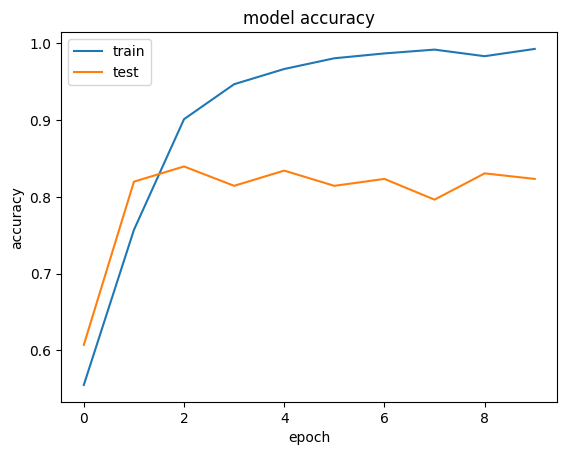

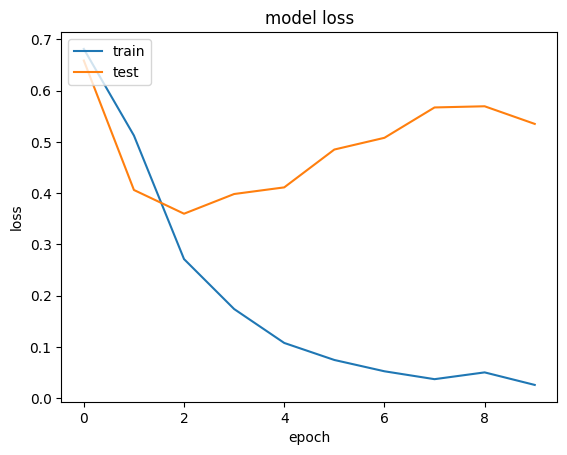

In [ ]:
# On trace la loss et l'accuracy du modèle bidirectionnel GRU
# On trace l'évolution de l'accuracy
plt.plot(history_attention.history['accuracy'])
plt.plot(history_attention.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# On trace l'évolution de la loss
plt.plot(history_attention.history['loss'])
plt.plot(history_attention.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On prédit sur les données de test
y_hat_7 = attention_model.predict(x_test)

# On tranforme les prédictions en labels
i_pos_7 = [i for i in range(len(y_hat_7)) if y_hat_7[i]>0]
i_neg_7 = [i for i in range(len(y_hat_7)) if y_hat_7[i]<=0]

y_pred_7   = np.zeros(len(y_hat_7))
y_pred_7[i_pos_7] = 1
y_pred_7[i_neg_7] = 0

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


# 10. Conclusion/interprétation

## 10.1. Comparaison des modèles

NameError: name 'history_LSTM' is not defined

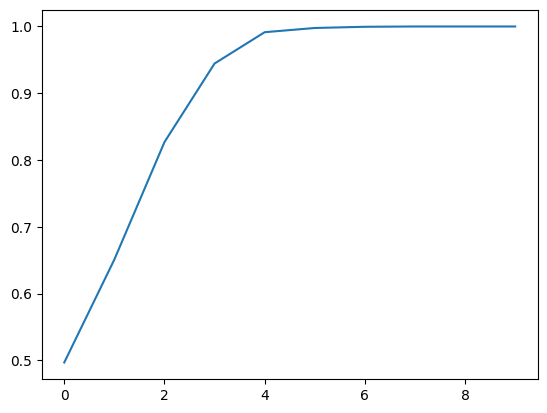

In [ ]:
# On trace la loss et l'accuracy des modèles sur le même graphe superposé en séparant données de tests et d'entrainement
# On trace l'évolution de l'accuracy pour les données d'entraînement
plt.plot(history.history['accuracy'])
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_bi_LSTM.history['accuracy'])
plt.plot(history_multi_bi_LSTM.history['accuracy'])
plt.plot(history_LSTM_bi_LSTM.history['accuracy'])
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_bi_GRU.history['accuracy'])
plt.plot(history_attention.history['accuracy'])
plt.title('Model Accuracy : Train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_modele_classique','train_LSTM','train_bi-LSTM','train_multi_LSTM','train_LSTM/bi-LSTM','train_GRU','train_bi-GRU'], loc='best')
plt.show()
# On trace l'évolution de l'accuracy pour les données de test
plt.plot(history.history['val_accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.plot(history_bi_LSTM.history['val_accuracy'])
plt.plot(history_multi_bi_LSTM.history['val_accuracy'])
plt.plot(history_LSTM_bi_LSTM.history['val_accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.plot(history_bi_GRU.history['val_accuracy'])
plt.plot(history_attention.history['val_accuracy'])
plt.title('Model Accuracy : Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test_modele_classique','test_LSTM','test_bi-LSTM','test_multi_LSTM','test_LSTM/bi-LSTM','test_GRU','test_bi-GRU'], loc='best')
plt.show()
# On trace l'évolution de la loss pour les données d'entrainement
plt.plot(history.history['loss'])
plt.plot(history_LSTM.history['loss'])
plt.plot(history_bi_LSTM.history['loss'])
plt.plot(history_multi_bi_LSTM.history['loss'])
plt.plot(history_LSTM_bi_LSTM.history['loss'])
plt.plot(history_GRU.history['loss'])
plt.plot(history_bi_GRU.history['loss'])
plt.plot(history_attention.history['loss'])
plt.title('Model Loss : Train')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_modele_classique','train_LSTM','train_bi-LSTM','train_multi_LSTM','train_LSTM/bi-LSTM','train_GRU','train_bi-GRU'], loc='best')
plt.show()
# On trace l'évolution de la loss pour les données de test
plt.plot(history.history['val_loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.plot(history_bi_LSTM.history['val_loss'])
plt.plot(history_multi_bi_LSTM.history['val_loss'])
plt.plot(history_LSTM_bi_LSTM.history['val_loss'])
plt.plot(history_GRU.history['val_loss'])
plt.plot(history_bi_GRU.history['val_loss'])
plt.plot(history_attention.history['val_loss'])
plt.title('Model Loss : Test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test_modele_classique','test_LSTM','test_bi-LSTM','test_multi_LSTM','test_LSTM/bi-LSTM','test_GRU','test_bi-GRU'], loc='best')
plt.show()

In [ ]:
# On importe les librairies pour l'évaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# On calcule la matrice de confusion
cm_test = confusion_matrix(y_test, y_pred)
cm_test_1 = confusion_matrix(y_test, y_pred_1)
cm_test_2 = confusion_matrix(y_test, y_pred_2)
cm_test_3 = confusion_matrix(y_test, y_pred_3)
cm_test_4 = confusion_matrix(y_test, y_pred_4)
cm_test_5 = confusion_matrix(y_test, y_pred_5)
cm_test_6 = confusion_matrix(y_test, y_pred_6)
cm_test_7 = confusion_matrix(y_test, y_pred_7)
print('La matrice de confusion sur le jeu de test avec le modèle simple est :\n', cm_test, '\n')
print('La matrice de confusion sur le jeu de test avec le modèle LSTM gauche-droite est :\n', cm_test_1, '\n')
print('La matrice de confusion sur le jeu de test avec le modèle bidirectionnel LSTM est:\n', cm_test_2, '\n')
print('La matrice de confusion sur le jeu de test avec le modèle multicouche bidirectionnel LSTM est:\n', cm_test_3, '\n')
print('La matrice de confusion sur le jeu de test avec le modèle LSTM simple puis bidirectionnel LSTM est:\n', cm_test_4, '\n')
print('La matrice de confusion sur le jeu de test avec le modèle GRU est:\n', cm_test_5, '\n')
print('La matrice de confusion sur le jeu de test avec le modèle bidirectionnel GRU est:\n', cm_test_6, '\n')
print('La matrice de confusion sur le jeu de test avec le modèle RNN avec attention est:\n', cm_test_7, '\n')

# On calcul le score d accuracy
acc_train=accuracy_score(y_test, y_pred)
print('L accuracy sur le jeu de test (modèle simple) est :\n', acc_train)

acc_train_1=accuracy_score(y_test, y_pred_1)
print('L accuracy sur le jeu de test (LSTM gauche-droite) est :\n', acc_train_1)

acc_train_2=accuracy_score(y_test, y_pred_2)
print('L accuracy sur le jeu de test (bidirectionnel LSTM) est :\n', acc_train_2)

acc_train_3=accuracy_score(y_test, y_pred_3)
print('L accuracy sur le jeu de test (multicouche bidirectionnel LSTM) est :\n', acc_train_3)

acc_train_4=accuracy_score(y_test, y_pred_4)
print('L accuracy sur le jeu de test (LSTM simple puis bidirectionnel LSTM) est :\n', acc_train_4)

acc_train_5=accuracy_score(y_test, y_pred_5)
print('L accuracy sur le jeu de test (GRU) est :\n', acc_train_5)

acc_train_6=accuracy_score(y_test, y_pred_6)
print('L accuracy sur le jeu de test (bidirectionnel GRU) est :\n', acc_train_6)

acc_train_7=accuracy_score(y_test, y_pred_7)
print('L accuracy sur le jeu de test (RNN avec attention) est :\n', acc_train_7)

NameError: name 'y_pred_1' is not defined

## 10.2. Interprétation des résultats

Simple RNN :
  Ce modèle affiche une accuracy très basse. Le nombre de faux positifs est extrêmement élevé par rapport aux vrais positifs. Les vrais négatifs sont également relativement faibles, montrant que le modèle a du mal à trouver les relations contextuelles nécessaires pour faire des prédictions précises. Ceci est peut-être lié à l'incapacité des RNN simple à créer des dépendances sur le long terme.

LSTM Gauche-droite :
  L'utilisation d'une couche LSTM améliore sensiblement la précision et réduit le nombre de faux positifs et de faux négatifs. Cependant, il reste des erreurs, notamment dans les faux positifs, car il n’a pas encore la capacité de comprendre les dépendances dans les deux directions.

LSTM bi-directionnel :
  Ce modèle montre une très légère amélioration par rapport au LSTM gauche-droite, en particulier dans la baisse de la détection des faux positifs et dans la hausse de la détection des vrais positifs. L’approche bidirectionnelle prend en compte le contexte de la phrase des deux côtés de la séquence, mais les résultats restent similaires au modèle LSTM gauche-droite. Il est donc intereessant d'associer plusieurs couches pour essayer d'améliorer significativement la précision.

Multicouche bi-directionnel :
  Bien que ce modèle soit multicouche, la précision reste assez similaire, au modèle LSTM bidirectionnel à une couche. Il parvient à maintenir un nombre réduit de faux négatifs, mais n’améliore pas significativement les performances globales et demande d'avantage de temps de calcul, ce qui indique une structure trop complexe.

Une couche LSTM simple et une couche bi-directionnel :
  Ce modèle, combinant une couche LSTM simple et une bidirectionnelle, obtient une précision approximativement simiaire aux architectures testées. L'architecture combinée semble équilibrer la capacité d'apprentissage tout en capturant le contexte bidirectionnel.

GRU :
  Le modèle GRU affiche des performances acceptables mais légèrement inférieures au modèle LSTM gauche-droite en précision, tout en nécéssitant un temps de calcul modérément plus élevé. Il a un nombre de faux positifs élevé, mais le nombre de faux négatifs est faible. Il n'est donc pas très interressant en comparaison au modèle LSTM.

GRU bi-directionnel :
  Les résultats du GRU bi-directionnel sont également décevants en comparaison au LSTM et LSTM bi-directionnel. L'architecture semble être tromp complexe.

RNN avec attention :
Les résultats de la matrice de confusion ne sont pas probants. IL y a une erreur dans l'algorithme.

### Conclusion :
La meilleure architecture semble être le LSTM bi-directionnel. Toutefois, le temps de calcul n'est pas le meilleur car le LSTM est un tout petit peu moins performant, mais est en contrepartie plus rapide. Le choix de la structure du réseau dépondra donc de la complexité de la classification que nous souhaitons lui faire faire, et de la rapidité désiré.

###Axe d'amélioration :
Un RNN avec attention fonctionnel pourrait améliorer la classification en focalisant le modèle sur les mots et phrases importants pour prédire le sentiment, ce qui est difficile pour les RNN standards qui traitent toutes les informations de manière uniforme. L'attention permet aussi de mieux gérer les dépendances à long terme, ce qui a son importance dans les textes longs où les éléments clés peuvent être éloignés. En se concentrant sur les parties pertinentes, le modèle pourrait ainsi réduire les erreurs de faux positifs et faux négatifs.
